In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,models,transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt 
import os 
import torchvision

In [7]:
data_dir = r'F:\Dataset for Images\skin_disease'
train_dir=os.path.join(data_dir,'train')
test_dir=os.path.join(data_dir,'val')

In [8]:
data_transforms={
    'train':transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
    ]),
    'val':transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
    ])
}

In [9]:
train_dataset=datasets.ImageFolder(root=train_dir,transform=data_transforms['train'])
test_dataset=datasets.ImageFolder(root=test_dir,transform=data_transforms['val'])

In [12]:
train_loader=DataLoader(dataset=train_dataset,batch_size=32,shuffle=True,num_workers=4)
test_loader=DataLoader(dataset=test_dataset,batch_size=32,shuffle=False,num_workers=4)

In [14]:
class_names=train_dataset.classes
num_classes=len(class_names)
print(f'classes:{class_names}')

classes:['Actinic keratosis', 'Atopic Dermatitis', 'Benign keratosis', 'Dermatofibroma', 'Melanocytic nevus', 'Melanoma', 'Squamous cell carcinoma', 'Tinea Ringworm Candidiasis', 'Vascular lesion']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


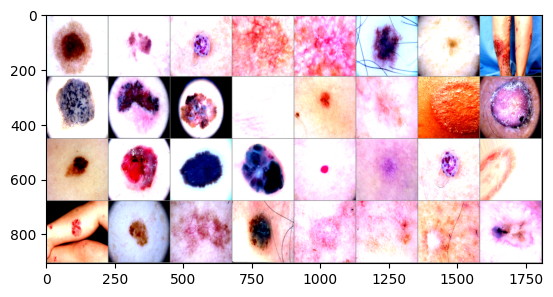

In [15]:
def imshow(img):
    img=img/2+0.5
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
    
    
dataiter=iter(train_loader)
images,labels=next(dataiter)

imshow(torchvision.utils.make_grid(images))

In [17]:
model=models.resnet18(pretrained=True)
num_ftrs=model.fc.in_features
model.fc=nn.Linear(num_ftrs,num_classes)

C:\Users\USER\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\USER/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [02:45<00:00, 283kB/s] 


In [18]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=model.to(device)

In [19]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [ ]:
num_epochs = 10
for epoch in range(num_epochs):
    print(f'Training - Epoch {epoch+1}/{num_epochs}')
    print('-' * 10)

    model.train() 

    running_loss = 0.0
    running_corrects = 0
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()  
        outputs = model(inputs)

        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(predicted == labels.data)

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects.double() / len(train_dataset)

    print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')


Training - Epoch 1/10
----------
Train Loss: 0.2618 Acc: 0.8996
Training - Epoch 2/10
----------
Train Loss: 0.2122 Acc: 0.9283
Training - Epoch 3/10
----------
Train Loss: 0.1539 Acc: 0.9455
Training - Epoch 4/10
----------
Train Loss: 0.1882 Acc: 0.9311
Training - Epoch 5/10
----------
Train Loss: 0.1061 Acc: 0.9641
Training - Epoch 6/10
----------
Train Loss: 0.0684 Acc: 0.9785
Training - Epoch 7/10
----------
Train Loss: 0.0687 Acc: 0.9742
Training - Epoch 8/10
----------
Train Loss: 0.1115 Acc: 0.9641
Training - Epoch 9/10
----------


In [ ]:
print('\nValidation'+'-'*10)
model.eval()
running_loss_val=0.0
running_corrects_val=0
for inputs,labels in test_loader:
    inputs=inputs.to(device)
    labels=labels.to(device)
    with torch.no_grad():
        outputs=model(inputs)
        _,preds=torch.max(outputs,1)
        loss=criterion(outputs,labels)
    running_loss_val+=loss.item()*inputs.size(0)
    running_corrects_val+=torch.sum(preds==labels.data)

val_loss=running_loss_val/len(test_dataset)
val_acc=running_corrects_val.double()/len(test_dataset)
print(f'Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}')
